In [1]:
using ReinforcementLearningAnIntroduction

In [2]:
env = WindyGridWorldEnv()
ns = length(get_observation_space(env))
na = length(get_action_space(env))

agent = Agent(
    policy=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularApproximator(;n_state=ns, n_action=na),
            optimizer=Descent(0.5)
        ),
        explorer=EpsilonGreedyExplorer(0.1)
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
);

hook = StepsPerEpisode()
run(agent, env, StopAfterStep(8000),hook)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


StepsPerEpisode([428, 439, 440, 123, 93, 107, 114, 56, 43, 51  …  27, 21, 29, 29, 19, 23, 20, 30, 19, 21], 12, "TRAINING")

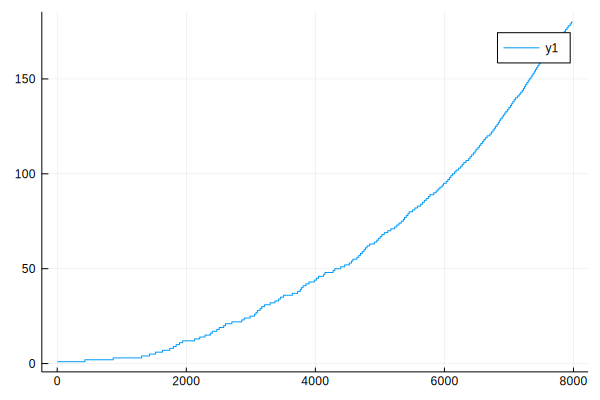

In [3]:
using Plots
plot([i for (i, x) in enumerate(hook.steps) for _ in 1:x])